In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## variables to predict
1. soil moisture
2. solution pH

In [10]:
columns=['datetime', 'expt_num', 'sitename', 'type', 'index', 'value']

df = pd.read_csv("Large_sensors.csv", names=columns)

try:
    df.drop(['expt_num', 'sitename'], axis=1, inplace=True)

except:
    print("Already dropped")
    
df.head()

,datetime,type,index,value
0,02/14/2023 20:30,temperature,0,28.60
1,02/14/2023 20:30,humidity,0,55.20
2,02/14/2023 20:30,temperature,1,29.20
3,02/14/2023 20:30,humidity,1,62.60
4,02/14/2023 20:30,light_intensity,0,378.75


In [11]:
df['type'].value_counts()

light_intensity    5886
soil_moisture      5886
temperature        1308
humidity           1308
solution_pH         654
solution_EC         654
Name: type, dtype: int64

In [12]:
sensor_types = pd.unique(df['type'])
sensor_types

array(['temperature', 'humidity', 'light_intensity', 'soil_moisture',
       'solution_pH', 'solution_EC'], dtype=object)

In [13]:
DATA_PER_SENSOR = sum(df['type'] == 'solution_pH')

for type in sensor_types:
    mask = df['type'] == type
    print(f"{type}: {df[mask].shape[0] / DATA_PER_SENSOR:.2f} sensors")

temperature: 2.00 sensors
humidity: 2.00 sensors
light_intensity: 9.00 sensors
soil_moisture: 9.00 sensors
solution_pH: 1.00 sensors
solution_EC: 1.00 sensors


In [14]:
sensor_dict = {}
for typ in sensor_types:
    _sensor = df.loc[df['type'] == typ] # select what type of sensor
    
    for ind in pd.unique(_sensor['index']): # select ith sensor
        sensor_dict[f'{typ}_{ind}'] = _sensor.loc[_sensor['index'] == ind]['value'].values
        print(f"{typ}_{ind}: {_sensor.loc[_sensor['index'] == ind]['value'].isna().sum()} nan values")

temperature_0: 1 nan values
temperature_1: 0 nan values
humidity_0: 1 nan values
humidity_1: 0 nan values
light_intensity_0: 547 nan values
light_intensity_1: 158 nan values
light_intensity_2: 158 nan values
light_intensity_3: 189 nan values
light_intensity_4: 158 nan values
light_intensity_5: 158 nan values
light_intensity_6: 547 nan values
light_intensity_7: 654 nan values
light_intensity_8: 473 nan values
soil_moisture_0: 0 nan values
soil_moisture_1: 0 nan values
soil_moisture_2: 0 nan values
soil_moisture_3: 0 nan values
soil_moisture_4: 0 nan values
soil_moisture_5: 0 nan values
soil_moisture_6: 0 nan values
soil_moisture_7: 0 nan values
soil_moisture_8: 0 nan values
solution_pH_0: 0 nan values
solution_EC_0: 0 nan values


In [15]:
#sensor_df = pd.DataFrame.from_dict(data=sensor_dict)
# since the dict values dont have equal length, use this instead
sensor_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in sensor_dict.items() ]))
sensor_df.head() # check first 5 rows

,temperature_0,temperature_1,humidity_0,humidity_1,light_intensity_0,light_intensity_1,light_intensity_2,light_intensity_3,light_intensity_4,light_intensity_5,...,soil_moisture_1,soil_moisture_2,soil_moisture_3,soil_moisture_4,soil_moisture_5,soil_moisture_6,soil_moisture_7,soil_moisture_8,solution_pH_0,solution_EC_0
0,28.6,29.2,55.2,62.6,378.750000,221.666667,104.583333,800.000000,153.333333,274.583333,...,1.0,1.0,1.0,1.0,1.0,1.0,0.858418,1.000000,3.238167,2.628156
1,28.2,25.5,56.3,61.1,380.416667,222.083333,104.166667,800.416667,154.583333,275.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.845923,1.000000,3.237843,2.447942
2,27.8,25.5,58.1,63.6,401.250000,223.333333,104.583333,804.583333,155.833333,290.416667,...,1.0,1.0,1.0,1.0,1.0,1.0,0.838021,1.000000,3.237111,2.416456
3,24.7,24.7,70.2,73.8,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.681829,0.951766,3.230280,0.828667
4,24.4,25.2,71.2,72.2,417.916667,230.000000,112.083333,831.666667,175.000000,300.416667,...,1.0,1.0,1.0,1.0,1.0,1.0,0.722071,1.000000,3.237111,0.818954


In [16]:
sensor_df.pop('light_intensity_7') # drop column containing all NaNs

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
649   NaN
650   NaN
651   NaN
652   NaN
653   NaN
Name: light_intensity_7, Length: 654, dtype: float64

In [17]:
# display rows with nan 
#sensor_df[sensor_df.isna().any(axis=1)]
sensor_df.loc[:, sensor_df.isna().any()]

,temperature_0,humidity_0,light_intensity_0,light_intensity_1,light_intensity_2,light_intensity_3,light_intensity_4,light_intensity_5,light_intensity_6,light_intensity_8
0,28.6,55.2,378.750000,221.666667,104.583333,800.000000,153.333333,274.583333,865.833333,415.833333
1,28.2,56.3,380.416667,222.083333,104.166667,800.416667,154.583333,275.000000,870.000000,417.500000
2,27.8,58.1,401.250000,223.333333,104.583333,804.583333,155.833333,290.416667,876.666667,419.583333
3,24.7,70.2,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,24.4,71.2,417.916667,230.000000,112.083333,831.666667,175.000000,300.416667,914.583333,475.000000
...,...,...,...,...,...,...,...,...,...,...
649,25.9,66.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,27.1,62.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,27.9,60.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,28.9,56.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
sensor_df = sensor_df.interpolate(axis=0)
sensor_df.head()

,temperature_0,temperature_1,humidity_0,humidity_1,light_intensity_0,light_intensity_1,light_intensity_2,light_intensity_3,light_intensity_4,light_intensity_5,...,soil_moisture_1,soil_moisture_2,soil_moisture_3,soil_moisture_4,soil_moisture_5,soil_moisture_6,soil_moisture_7,soil_moisture_8,solution_pH_0,solution_EC_0
0,28.6,29.2,55.2,62.6,378.750000,221.666667,104.583333,800.000000,153.333333,274.583333,...,1.0,1.0,1.0,1.0,1.0,1.0,0.858418,1.000000,3.238167,2.628156
1,28.2,25.5,56.3,61.1,380.416667,222.083333,104.166667,800.416667,154.583333,275.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.845923,1.000000,3.237843,2.447942
2,27.8,25.5,58.1,63.6,401.250000,223.333333,104.583333,804.583333,155.833333,290.416667,...,1.0,1.0,1.0,1.0,1.0,1.0,0.838021,1.000000,3.237111,2.416456
3,24.7,24.7,70.2,73.8,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.681829,0.951766,3.230280,0.828667
4,24.4,25.2,71.2,72.2,417.916667,230.000000,112.083333,831.666667,175.000000,300.416667,...,1.0,1.0,1.0,1.0,1.0,1.0,0.722071,1.000000,3.237111,0.818954


## Averaging sensor types

In [19]:
upperbound = ave_df.mean() + 2*ave_df.std()
lowerbound = ave_df.mean() - 2*ave_df.std()

NameError: name 'ave_df' is not defined

In [20]:
ave_df[(ave_df > upperbound) | (ave_df < lowerbound)]

NameError: name 'ave_df' is not defined

In [21]:
ave_df.shape

NameError: name 'ave_df' is not defined

In [22]:
ave_df.min(), ave_df.max()

NameError: name 'ave_df' is not defined

In [23]:
temp_cols = [col for col in sensor_df.columns if "temperature" in col]
humid_cols = [col for col in sensor_df.columns if "humidity" in col]
li_cols = [col for col in sensor_df.columns if "light_intensity" in col]
solution_EC = [col for col in sensor_df.columns if "solution_EC" in col]

ph_cols = [col for col in sensor_df.columns if "solution_pH" in col]
sm_cols = [col for col in sensor_df.columns if "soil_moisture" in col]

In [24]:
ave_list = []

temp_ave = sensor_df[temp_cols].mean(axis=1) # apply mean across column wise
humid_ave = sensor_df[humid_cols].mean(axis=1)
li_ave = sensor_df[li_cols].mean(axis=1)
sm_ave = sensor_df[sm_cols].mean(axis=1)

ave_list.append(temp_ave)
ave_list.append(humid_ave)
ave_list.append(li_ave)
ave_list.append(sensor_df[solution_EC].squeeze())

ave_list.append(sensor_df[ph_cols].squeeze())
ave_list.append(sm_ave)

In [25]:
ave_cols = ['temp_ave', 'humid_ave', 'li_ave', 'EC', 'ph', 'sm_ave']

ave_dict = {}

for k,v in zip(ave_cols, ave_list):
    ave_dict[k] = v
    

ave_df = pd.DataFrame.from_dict(ave_dict)
ave_df.head()

,temp_ave,humid_ave,li_ave,EC,ph,sm_ave
0,28.90,58.90,401.822917,2.628156,3.238167,0.984269
1,26.85,58.70,403.020833,2.447942,3.237843,0.982880
2,26.65,60.85,409.531250,2.416456,3.237111,0.982002
3,24.70,72.00,0.052083,0.828667,3.230280,0.959288
4,24.80,71.70,432.083333,0.818954,3.237111,0.969119


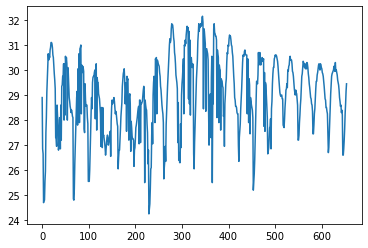

In [26]:
plt.plot(ave_df['temp_ave'])

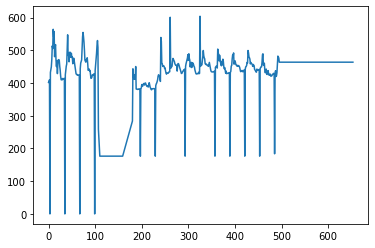

In [27]:
plt.plot(ave_df['li_ave'])

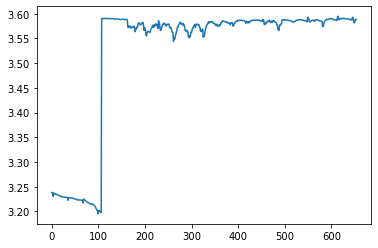

In [28]:
plt.plot(ave_df['ph'])

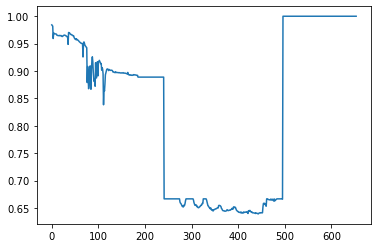

In [29]:
plt.plot(ave_df['sm_ave'])

## Expected dict output:
1. datetime
2. exp_num (just copy)
3. pred_ph 
4. pred_moisture
5. sitename
6. index

## Train test split

In [30]:
M,N = ave_df.shape

X_cols = ave_cols[:-2]
y_cols = ave_cols[-2:]

# Train and test split
train_percent = 0.8 # 80% of dataset goes to training

train = ave_df.iloc[:int(M*train_percent),:]
test = ave_df.iloc[int(M*train_percent):,:]

print(f"Train length: {train.shape[0]}, Test length: {test.shape[0]}")

Train length: 523, Test length: 131


In [31]:
X_train = train[X_cols]
y_train = train[y_cols]

X_test = test[X_cols]
y_test = test[y_cols]

In [32]:
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_test, y_test = X_test.to_numpy(), y_test.to_numpy()

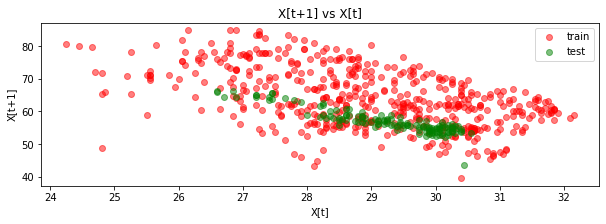

In [33]:
plt.figure(figsize=(10,3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")

plt.scatter(X_train[:,0], X_train[:,1], c='r', alpha=0.5, label='train')
plt.scatter(X_test[:,0], X_test[:,1], c='g', alpha=0.5, label='test')

plt.legend()

In [34]:
y_train_ph, y_train_sm = y_train[:,0], y_train[:,1]

## Extrapolation: SVR

References:

1. https://www.educba.com/support-vector-regression/
2. https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2
3. SVR vs LR: https://towardsdatascience.com/support-vector-regression-svr-one-of-the-most-flexible-yet-robust-prediction-algorithms-4d25fbdaca60

In [35]:
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error # MAPE
from sklearn.metrics import mean_squared_error # MSE

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:5]

array([[0.58860759, 0.42731278, 0.66540154, 0.68113486],
       [0.32911392, 0.42290749, 0.66738549, 0.61779912],
       [0.30379747, 0.47026432, 0.67816786, 0.60673362],
       [0.05696203, 0.71585903, 0.        , 0.0487104 ],
       [0.06962025, 0.7092511 , 0.71551798, 0.04529662]])

In [37]:
scaler.data_min_, scaler.data_max_, scaler.scale_

(array([24.25      , 39.5       ,  0.05208333,  0.69006744]),
 array([ 32.15      ,  84.9       , 603.85416667,   3.53544958]),
 array([0.12658228, 0.02202643, 0.00165617, 0.35144664]))

In [38]:
svr = SVR()

In [39]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

regr = make_pipeline(MinMaxScaler(), SVR())
regr.fit(X_train, y_train_ph)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [40]:
y_pred = regr.predict(X_test)

In [41]:
#np.mean((y_pred - y_test[:,0])**2)
print(mean_absolute_percentage_error(y_pred, y_test[:,0]) * 100, "%") # get MAPE

1.3409645287932257 %


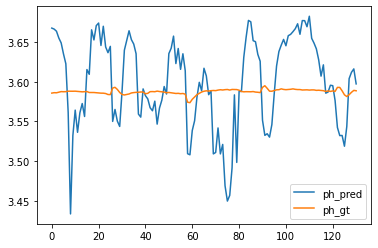

In [42]:
# plot lines
plt.plot(y_pred, label = "ph_pred")
plt.plot(y_test[:,0], label = "ph_gt")
plt.legend()
plt.show()

## saving model: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

## save model 

In [ ]:
import pickle

In [44]:
# save the model to disk
filename = 'model_ph.sav'
#pickle.dump(regr, open(filename, 'wb'))

In [46]:
import joblib
joblib.dump(regr, filename)

['model_ph.sav']

### soil moisture

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:5]

svr = SVR()

In [5]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

regr = make_pipeline(MinMaxScaler(), SVR())
regr.fit(X_train, y_train_sm)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
#np.mean((y_pred - y_test[:,1])**2)

print(mean_absolute_percentage_error(y_pred, y_test[:,1])*100,"%")

In [6]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test[:,1])

NameError: name 'y_pred' is not defined

In [ ]:

mean_squared_error(y_pred, y_test[:,1])

In [7]:
mape_sum = 0

for y,yhat in zip(y_pred, y_test[:,1]):
    mape_sum += np.abs((yhat-y)/y)

mape_sum / len(y_pred) * 100

NameError: name 'y_pred' is not defined

In [ ]:
# plot lines
plt.plot(y_pred, label = "sm_pred")
plt.plot(y_test[:,1], label = "sm_gt")
plt.legend()
plt.show()